In [1]:
from fleck import generate_spots, Star
from michael import janet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

Hi there. Welcome to the good place.


Let's set up the fleck parameters

TESS noise is roughly 800-1800 ppm

In [2]:
np.random.seed(802)
N = 250
spot_contrast = np.random.uniform(0.5, 1., size=N)
rotation_period = np.random.uniform(1.5, 27., size=N)
u_ld = [0.5, 0.2]

spot_radius = np.random.uniform(0.05, 0.15, size=N)
min_latitude = np.random.uniform(30, 60, size=N)
max_latitude = np.random.uniform(61, 85, size=N)

t = np.arange(0, 27., 0.02)
yerr = np.random.normal(800, 1500, size=N)*1e-6

n_phases = len(t)
n_inclinations = 1
n_spots = np.random.uniform(10, 30, size=N).astype(int)

In [3]:
np.random.seed(802)

sim = np.zeros((N, len(t)))
obs = np.zeros((N, len(t)))

for idx in range(N):
    lons, lats, radii, inc_stellar = generate_spots(min_latitude[idx], max_latitude[idx],
                                                   spot_radius[idx], n_spots[idx],
                                                   n_inclinations=n_inclinations)
    star = Star(spot_contrast = spot_contrast[idx], n_phases=n_phases, 
                u_ld = u_ld, rotation_period = rotation_period[idx])
    lc = star.light_curve(lons, lats, radii, inc_stellar, times=t)
    
    lc -= np.mean(lc)
    lc += 1.
    
    sim[idx, :] = lc.flatten()
    obs[idx, :] = lc.flatten() + yerr[idx] * np.random.randn(len(t))
               
plt.show()

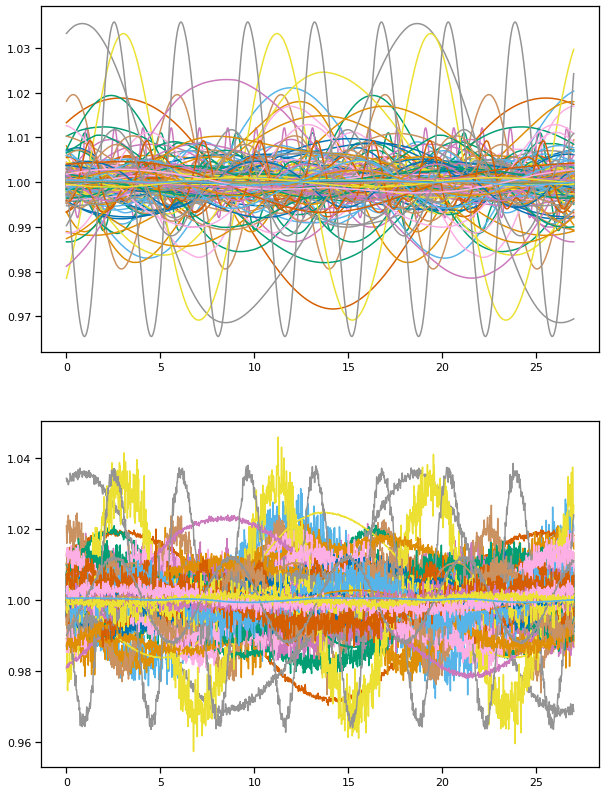

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10, 14))
ax[0].plot(t, sim.T)
ax[1].plot(t, obs.T)
plt.show()

Now let's obtain rotation for every target

In [5]:
df = pd.DataFrame(index = range(N), columns=['P', 'Perr', 'Pflag'])

for idx in range(N):
    j = janet(gaiaid = f'Test unit {idx}',
         output_path = "/Users/oliver hall/Research/michael/Examples/simtests",
         verbose=False)
    
    j.flux_override(t, obs[idx])
    j.get_rotation(period_range = (rotation_period.min(), rotation_period.max()))
    j.validate_rotation()
    
    df.loc[idx, 'P']= j.results.loc['best', 'overall']
    df.loc[idx, 'Perr']= j.results.loc['best', 'e_overall']
    df.loc[idx, 'Pflag']= j.results.loc['best', 'f_overall']
df['Ptrue'] = rotation_period
df.to_csv('simulated_periods.csv')

/Users/Anaconda/anaconda3/lib/python3.8/site-packages/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 53/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 54/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 55/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 56/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 57/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 58/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 59/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 60/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 61/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 62/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 63/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 64/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 65/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 66/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 67/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 68/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 69/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 70/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 71/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 72/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 73/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 74/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 75/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 76/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 77/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 78/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 79/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 80/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 81/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 82/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 83/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 84/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 85/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 86/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 87/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 88/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 89/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 90/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 91/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 92/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 93/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 94/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 95/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 96/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 97/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 98/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 99/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 100/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 101/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 102/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 103/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 104/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 105/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 106/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 107/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 108/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 109/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 110/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 111/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 112/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 113/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 114/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 115/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 116/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 117/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 118/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 119/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 120/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 121/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 122/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 123/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 124/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 125/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 126/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 127/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 128/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 129/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 130/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 131/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 132/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 133/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 134/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 135/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 136/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 137/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 138/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 139/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 140/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 141/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 142/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 143/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 144/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 145/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 146/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 147/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 148/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 149/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 150/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 151/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 152/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 153/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 154/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 155/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 156/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 157/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 158/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 159/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 160/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 161/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 162/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 163/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 164/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 165/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 166/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 167/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 168/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 169/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 170/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 171/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 172/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 173/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 174/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 175/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 176/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 177/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 178/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 179/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 180/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 181/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 182/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 183/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 184/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 185/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 186/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 187/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 188/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 189/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 190/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 191/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 192/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 193/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 194/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 195/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 196/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 197/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 198/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 199/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 200/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 201/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 202/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 203/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 204/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 205/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 206/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 207/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 208/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 209/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 210/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 211/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 212/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 213/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 214/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 215/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 216/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 217/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 218/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 219/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 220/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 221/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 222/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 223/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 224/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 225/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 226/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 227/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 228/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 229/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 230/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 231/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 232/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 233/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 234/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 235/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 236/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 237/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 238/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 239/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 240/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 241/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 242/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 243/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 244/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 245/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 246/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 247/...



Making folder /Users/oliver hall/Research/michael/Examples/simtests/Test unit 248/...


In [11]:
df['Ptrue'] = rotation_period
df.to_csv('simulated_periods.csv')

In [12]:
df

,P,Perr,Pflag,Ptrue
0,5.97053,0.489025,2.0,5.948987
1,15.069419,1.506942,1.0,15.474052
2,1.652331,0.036168,385.0,1.651623
3,15.88697,2.329862,1.0,16.023198
4,4.209192,1.053731,290.0,23.385543
...,...,...,...,...
245,26.969728,2.696973,129.0,26.213986
246,26.694612,4.82976,130.0,25.188250
247,6.164305,0.216071,2.0,6.190319
248,13.762632,1.376263,1.0,13.792549


### Comparing outcomes

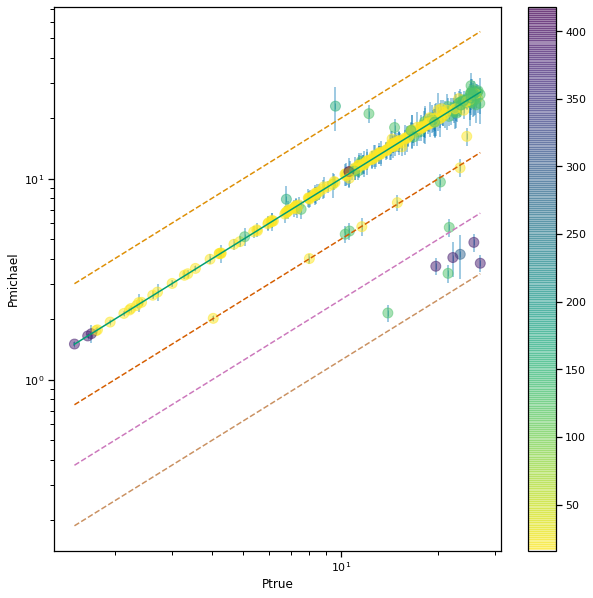

In [108]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.scatter(df.Ptrue, df.P, c = df.Pflag, s=100, zorder=2, alpha=.5, vmin=16, 
               cmap='viridis_r')
ax.errorbar(df.Ptrue, df.P, yerr=df.Perr, fmt='|', zorder=1, alpha=.5)

lintru = np.linspace(df.Ptrue.min(), df.Ptrue.max(), 100)
ax.plot(lintru, 2*lintru, ls='--')
ax.plot(lintru, lintru, ls='-')
ax.plot(lintru, 0.5*lintru, ls='--')
ax.plot(lintru, 0.25*lintru, ls='--')
ax.plot(lintru, 0.125*lintru, ls='--')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Ptrue')
ax.set_ylabel('Pmichael')
fig.colorbar(c)

## Let's investigate some of the stars that are being excluded

In [42]:
out = df[np.abs(df.P - df.Ptrue) > df.Perr]


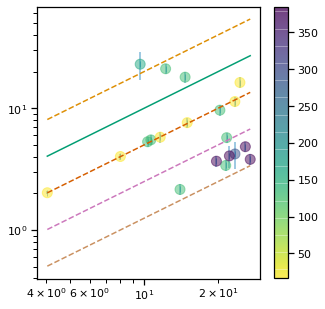

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
c = ax.scatter(out.Ptrue, out.P, c = out.Pflag, s=100, zorder=2, alpha=.5, vmin=16, 
               cmap='viridis_r')
ax.errorbar(out.Ptrue, out.P, yerr=out.Perr, fmt='|', zorder=1, alpha=.5)

lintru = np.linspace(out.Ptrue.min(), out.Ptrue.max(), 100)
ax.plot(lintru, 2*lintru, ls='--')
ax.plot(lintru, lintru, ls='-')
ax.plot(lintru, 0.5*lintru, ls='--')
ax.plot(lintru, 0.25*lintru, ls='--')
ax.plot(lintru, 0.125*lintru, ls='--')

ax.set_yscale('log')
ax.set_xscale('log')

fig.colorbar(c)

### The three targets above the line

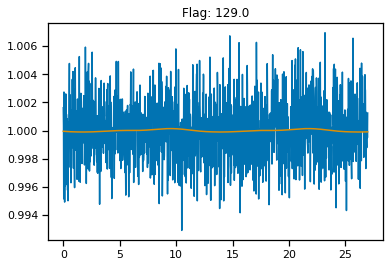

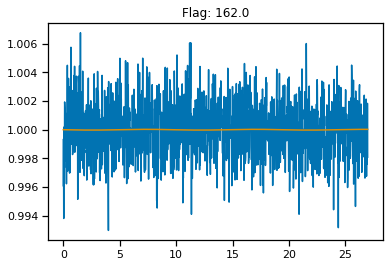

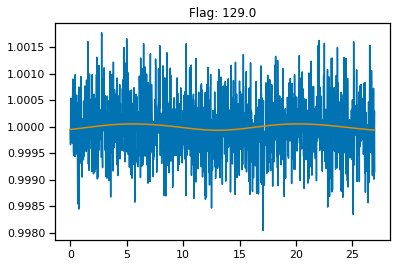

In [50]:
hi = out[(out.P - out.Ptrue) > out.Perr]
for idx in hi.index:
    plt.title(f'Flag: {hi.loc[idx, "Pflag"]}')
    plt.plot(t, obs[idx])
    plt.plot(t, sim[idx])
    plt.show()

**Conclusion**: Small amplitudes at large uncertainties, unmeasurable. Appropriate flags, behaving as intended.

### Targets on the 2:1 line

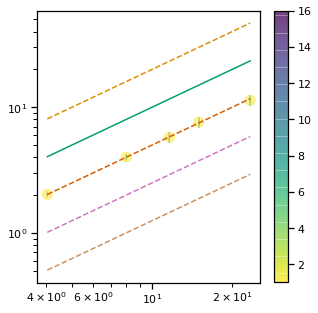

In [58]:
hi = out[np.abs(out.P-0.5*out.Ptrue) < out.Perr]
hi = hi[hi.Pflag < 16]
fig, ax = plt.subplots(figsize=(5, 5))
c = ax.scatter(hi.Ptrue, hi.P, c = hi.Pflag, s=100, zorder=2, alpha=.5, vmin=16, 
               cmap='viridis_r')
ax.errorbar(hi.Ptrue, hi.P, yerr=hi.Perr, fmt='|', zorder=1, alpha=.5)

lintru = np.linspace(hi.Ptrue.min(), hi.Ptrue.max(), 100)
ax.plot(lintru, 2*lintru, ls='--')
ax.plot(lintru, lintru, ls='-')
ax.plot(lintru, 0.5*lintru, ls='--')
ax.plot(lintru, 0.25*lintru, ls='--')
ax.plot(lintru, 0.125*lintru, ls='--')

ax.set_yscale('log')
ax.set_xscale('log')

fig.colorbar(c)

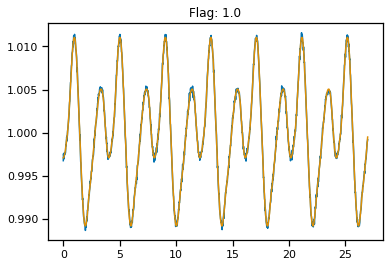

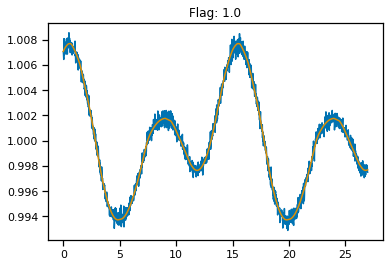

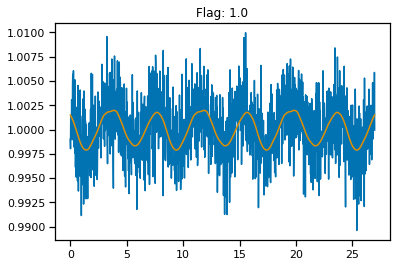

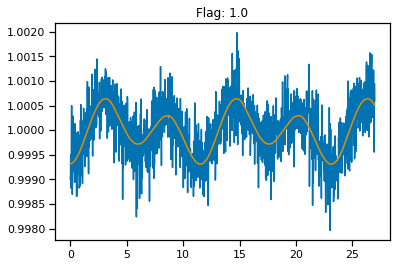

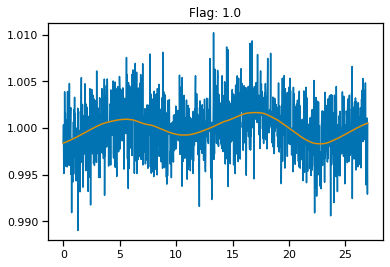

In [59]:
for idx in hi.index:
    plt.title(f'Flag: {hi.loc[idx, "Pflag"]}')
    plt.plot(t, obs[idx])
    plt.plot(t, sim[idx])
    plt.show()

**Conclusions**: There are 2 stars which would benefit from a compound ACF treatment. The remaining 3 stars appear to serendipitously have spots on opposite sides of the stellar sphere, giving rise to faux-harmonic signals.

## The remaining stars < 2:1 line

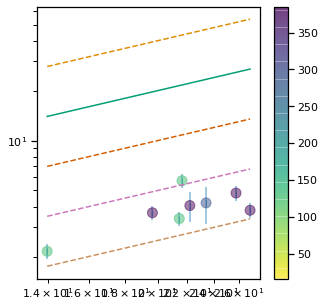

In [68]:
hi = out[out.P < 0.3*out.Ptrue]


fig, ax = plt.subplots(figsize=(5, 5))
c = ax.scatter(hi.Ptrue, hi.P, c = hi.Pflag, s=100, zorder=2, alpha=.5, vmin=16, 
               cmap='viridis_r')
ax.errorbar(hi.Ptrue, hi.P, yerr=hi.Perr, fmt='|', zorder=1, alpha=.5)

lintru = np.linspace(hi.Ptrue.min(), hi.Ptrue.max(), 100)
ax.plot(lintru, 2*lintru, ls='--')
ax.plot(lintru, lintru, ls='-')
ax.plot(lintru, 0.5*lintru, ls='--')
ax.plot(lintru, 0.25*lintru, ls='--')
ax.plot(lintru, 0.125*lintru, ls='--')

ax.set_yscale('log')
ax.set_xscale('log')

fig.colorbar(c)

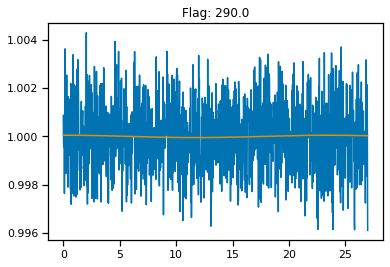

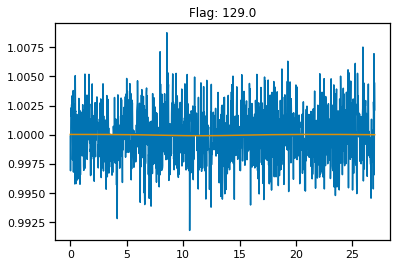

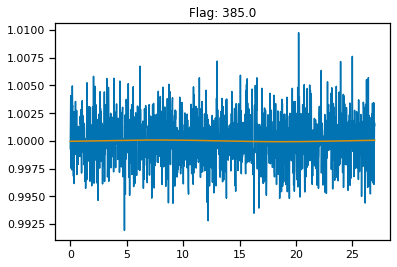

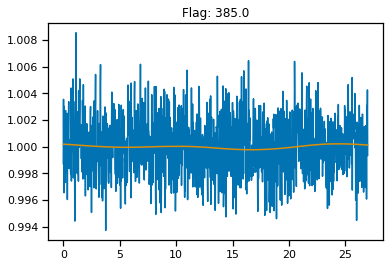

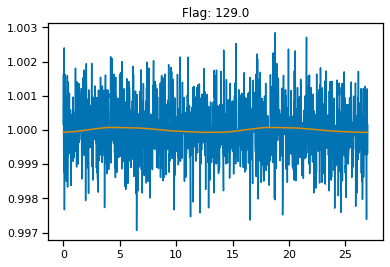

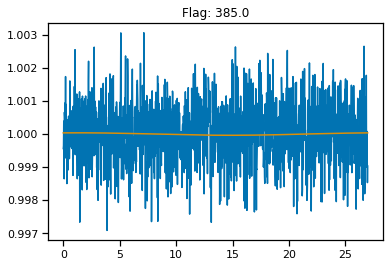

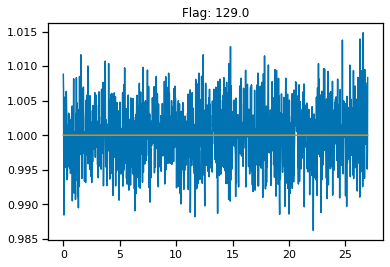

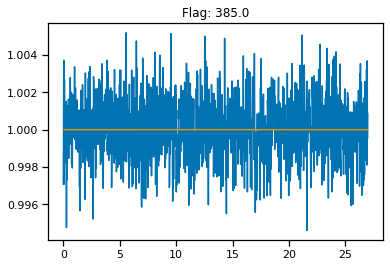

In [69]:
for idx in hi.index:
    plt.title(f'Flag: {hi.loc[idx, "Pflag"]}')
    plt.plot(t, obs[idx])
    plt.plot(t, sim[idx])
    plt.show()

## Finally, flagged stars within the 1:1 scope

In [70]:
j.decode(126)


------ Decoding Overall Period Flag 126 ------
64: No ACF period could be reliably measured (indicating low power or long periods).
32: No robust matches were found between the SW period and any unflagged SLS periods.
16: Valididation between WS and SLS was done using a SLS period that was not the 'best' SLS value (lowest uncertainty without flags), because there was no 2 sigma agreement with the SW period.
8: Best rotation is from the Gaussian Process (GP) method.
4: Best rotation is from the Simple Autocorrelation Function (ACF) method.
2: Best rotation is from the Simple Wavelet (SW) method.

No other flags raised. 



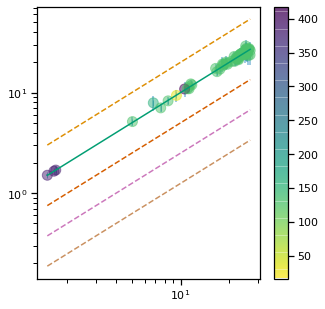

In [75]:
hi = df[(np.abs(df.P - df.Ptrue) < df.Perr) & (df.Pflag > 16)]


fig, ax = plt.subplots(figsize=(5, 5))
c = ax.scatter(hi.Ptrue, hi.P, c = hi.Pflag, s=100, zorder=2, alpha=.5, vmin=16, 
               cmap='viridis_r')
ax.errorbar(hi.Ptrue, hi.P, yerr=hi.Perr, fmt='|', zorder=1, alpha=.5)

lintru = np.linspace(hi.Ptrue.min(), hi.Ptrue.max(), 100)
ax.plot(lintru, 2*lintru, ls='--')
ax.plot(lintru, lintru, ls='-')
ax.plot(lintru, 0.5*lintru, ls='--')
ax.plot(lintru, 0.25*lintru, ls='--')
ax.plot(lintru, 0.125*lintru, ls='--')

ax.set_yscale('log')
ax.set_xscale('log')

fig.colorbar(c)

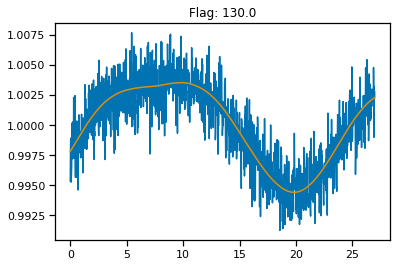

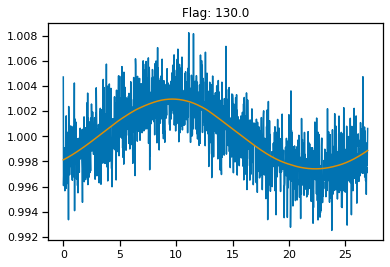

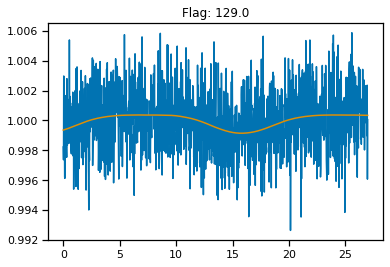

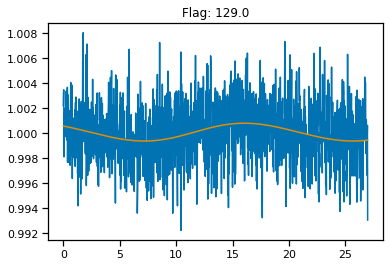

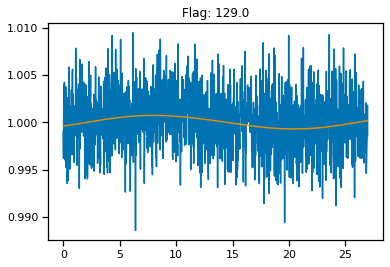

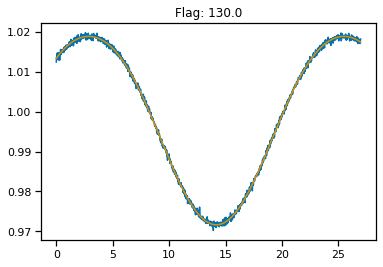

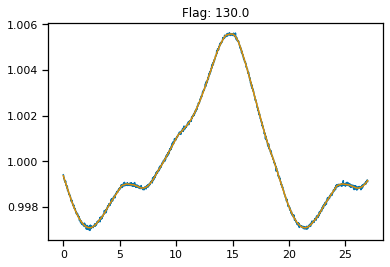

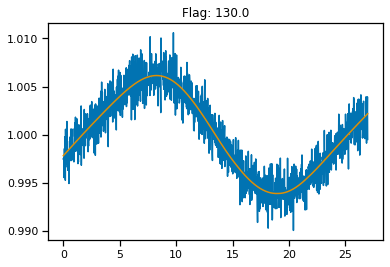

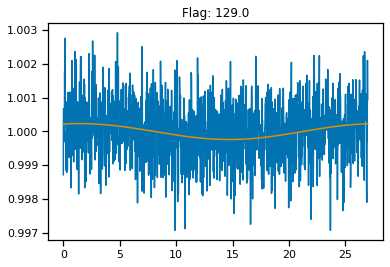

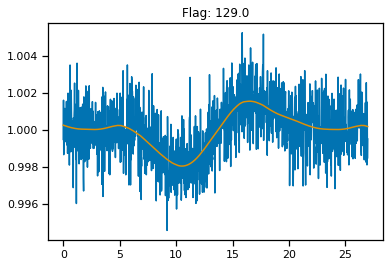

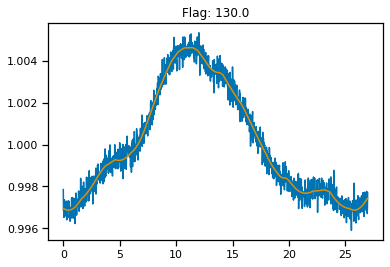

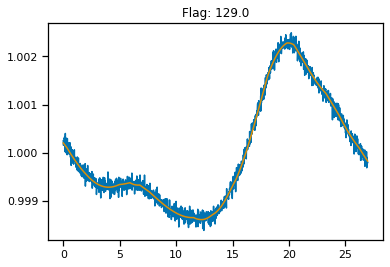

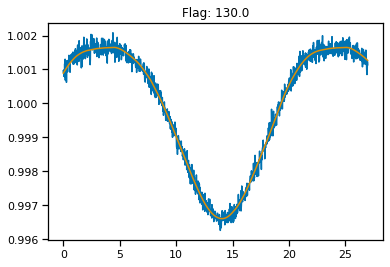

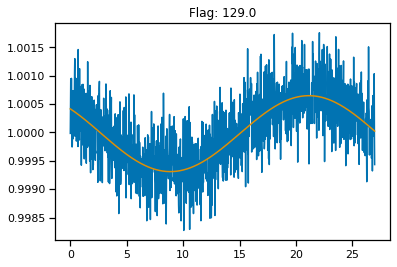

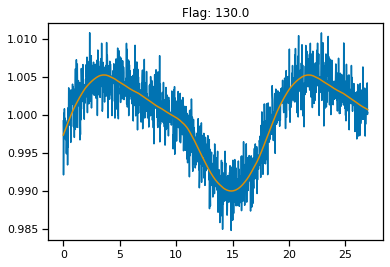

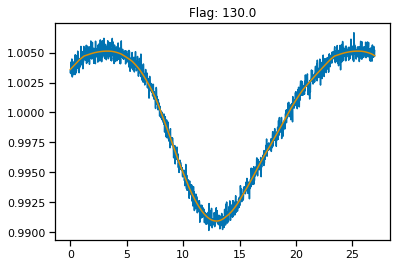

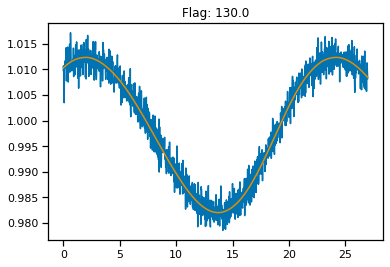

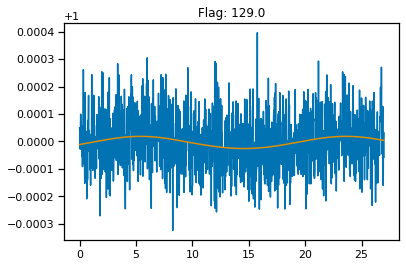

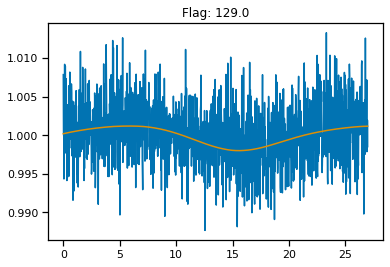

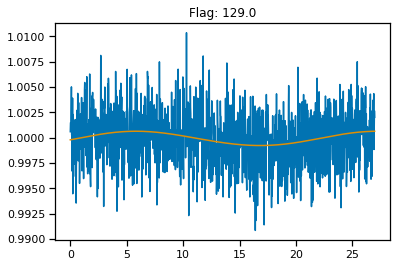

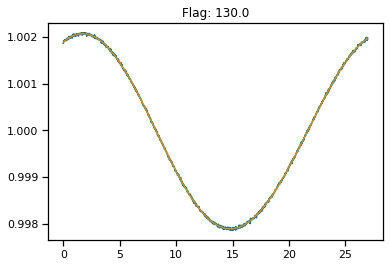

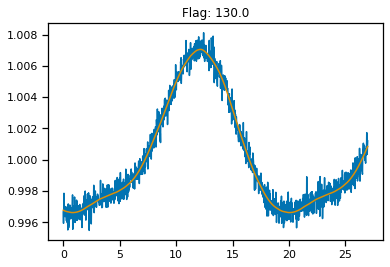

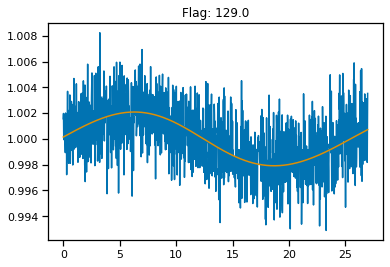

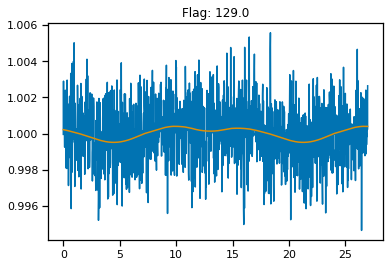

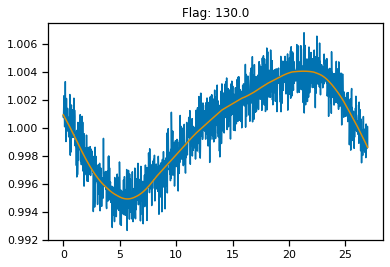

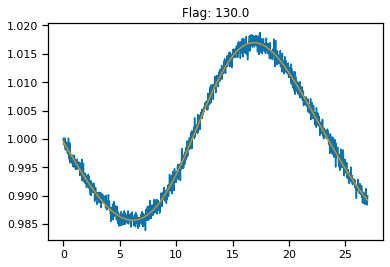

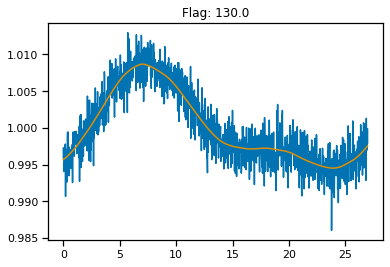

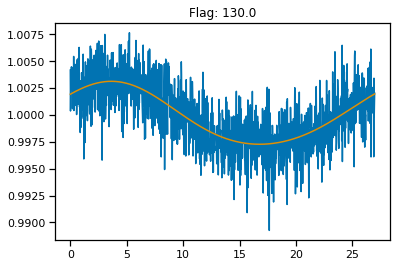

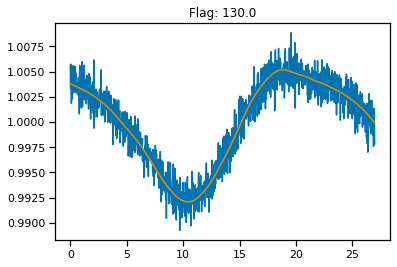

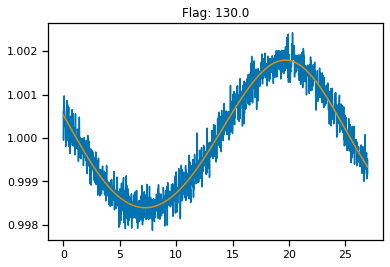

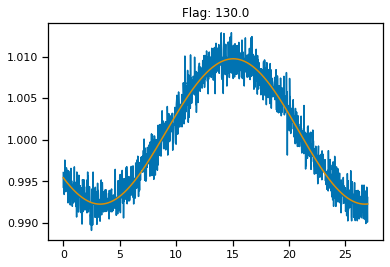

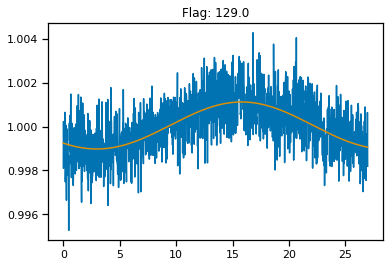

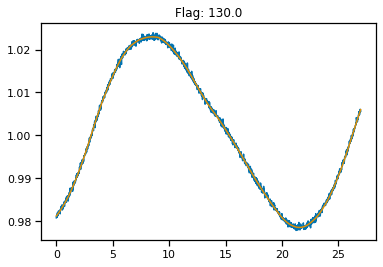

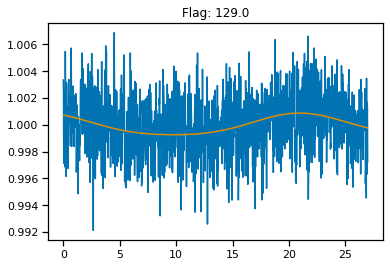

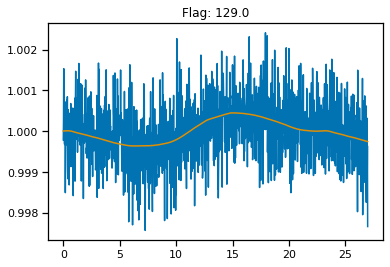

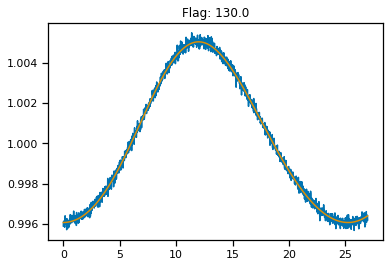

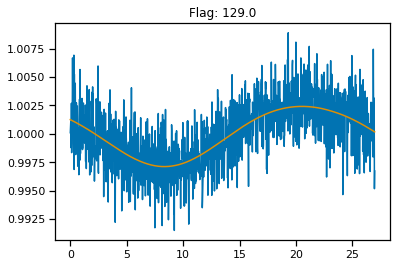

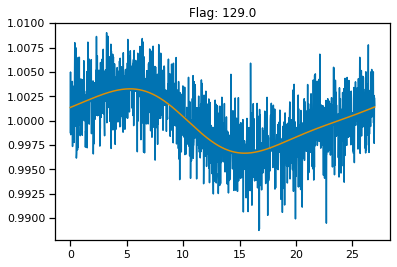

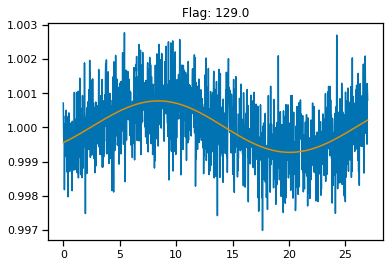

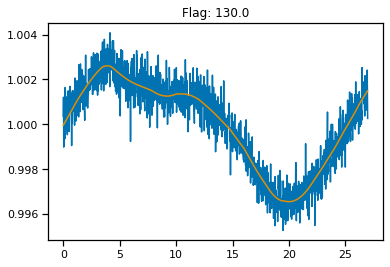

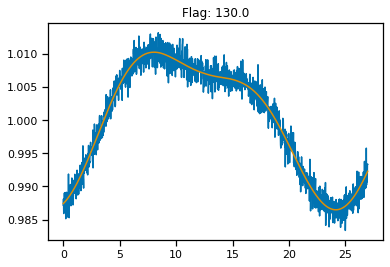

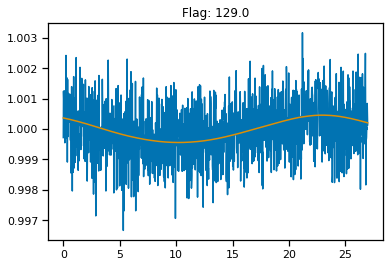

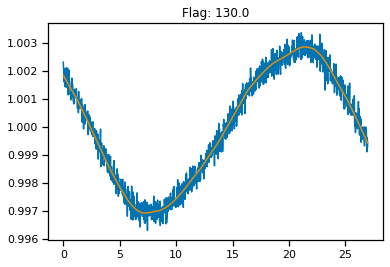

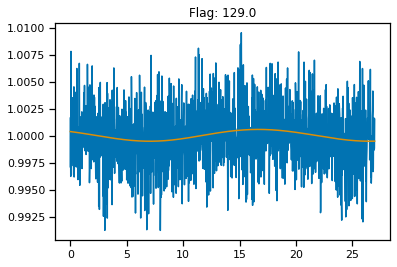

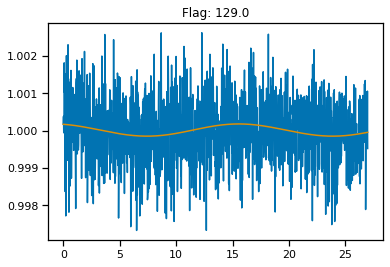

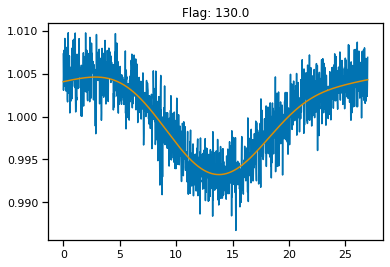

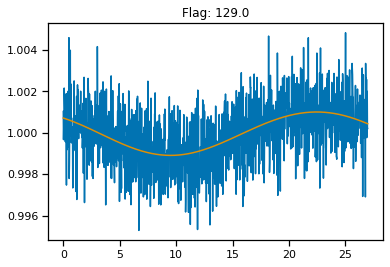

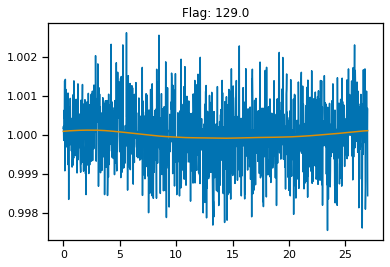

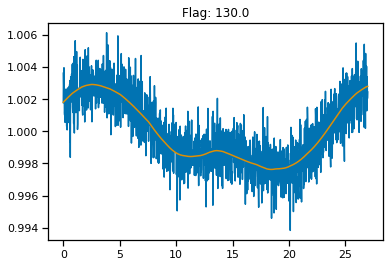

In [80]:
hi = df[(np.abs(df.P - df.Ptrue) < df.Perr) & (df.Pflag > 16) & (df.P > 15)]
for idx in hi.index:
    plt.title(f'Flag: {hi.loc[idx, "Pflag"]}')
    plt.plot(t, obs[idx])
    plt.plot(t, sim[idx])
    plt.show()

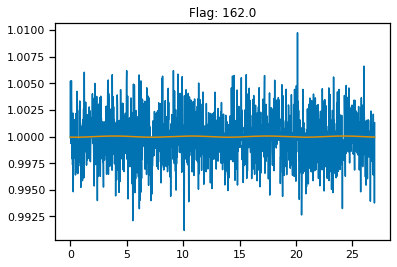

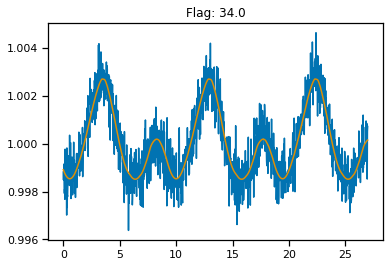

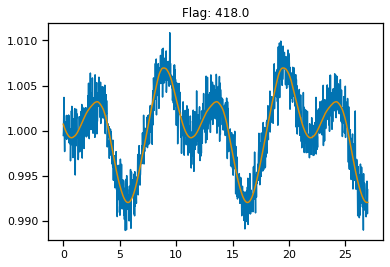

In [94]:
hi = df[(np.abs(df.P - df.Ptrue) < df.Perr) & (df.Pflag > 16) & (df.P < 15) & (df.P > 4) & (df.Pflag != 129)]
for idx in hi.index:
    plt.title(f'Flag: {hi.loc[idx, "Pflag"]}')
    plt.plot(t, obs[idx])
    plt.plot(t, sim[idx])
    plt.show()

In [95]:
hi

,P,Perr,Pflag,Ptrue
34,7.908551,1.313592,162.0,6.787805
126,9.372242,1.324586,34.0,9.433802
197,10.855571,1.845174,418.0,10.594324


In [105]:
    idx = 197
    j = janet(gaiaid = f'Test unit {idx}',
         output_path = "/Users/oliver hall/Research/michael/Examples/simtests",
         verbose=False)
    
    j.flux_override(t, obs[idx])
    j.get_rotation(period_range = (rotation_period.min(), rotation_period.max()))
    j.validate_rotation()

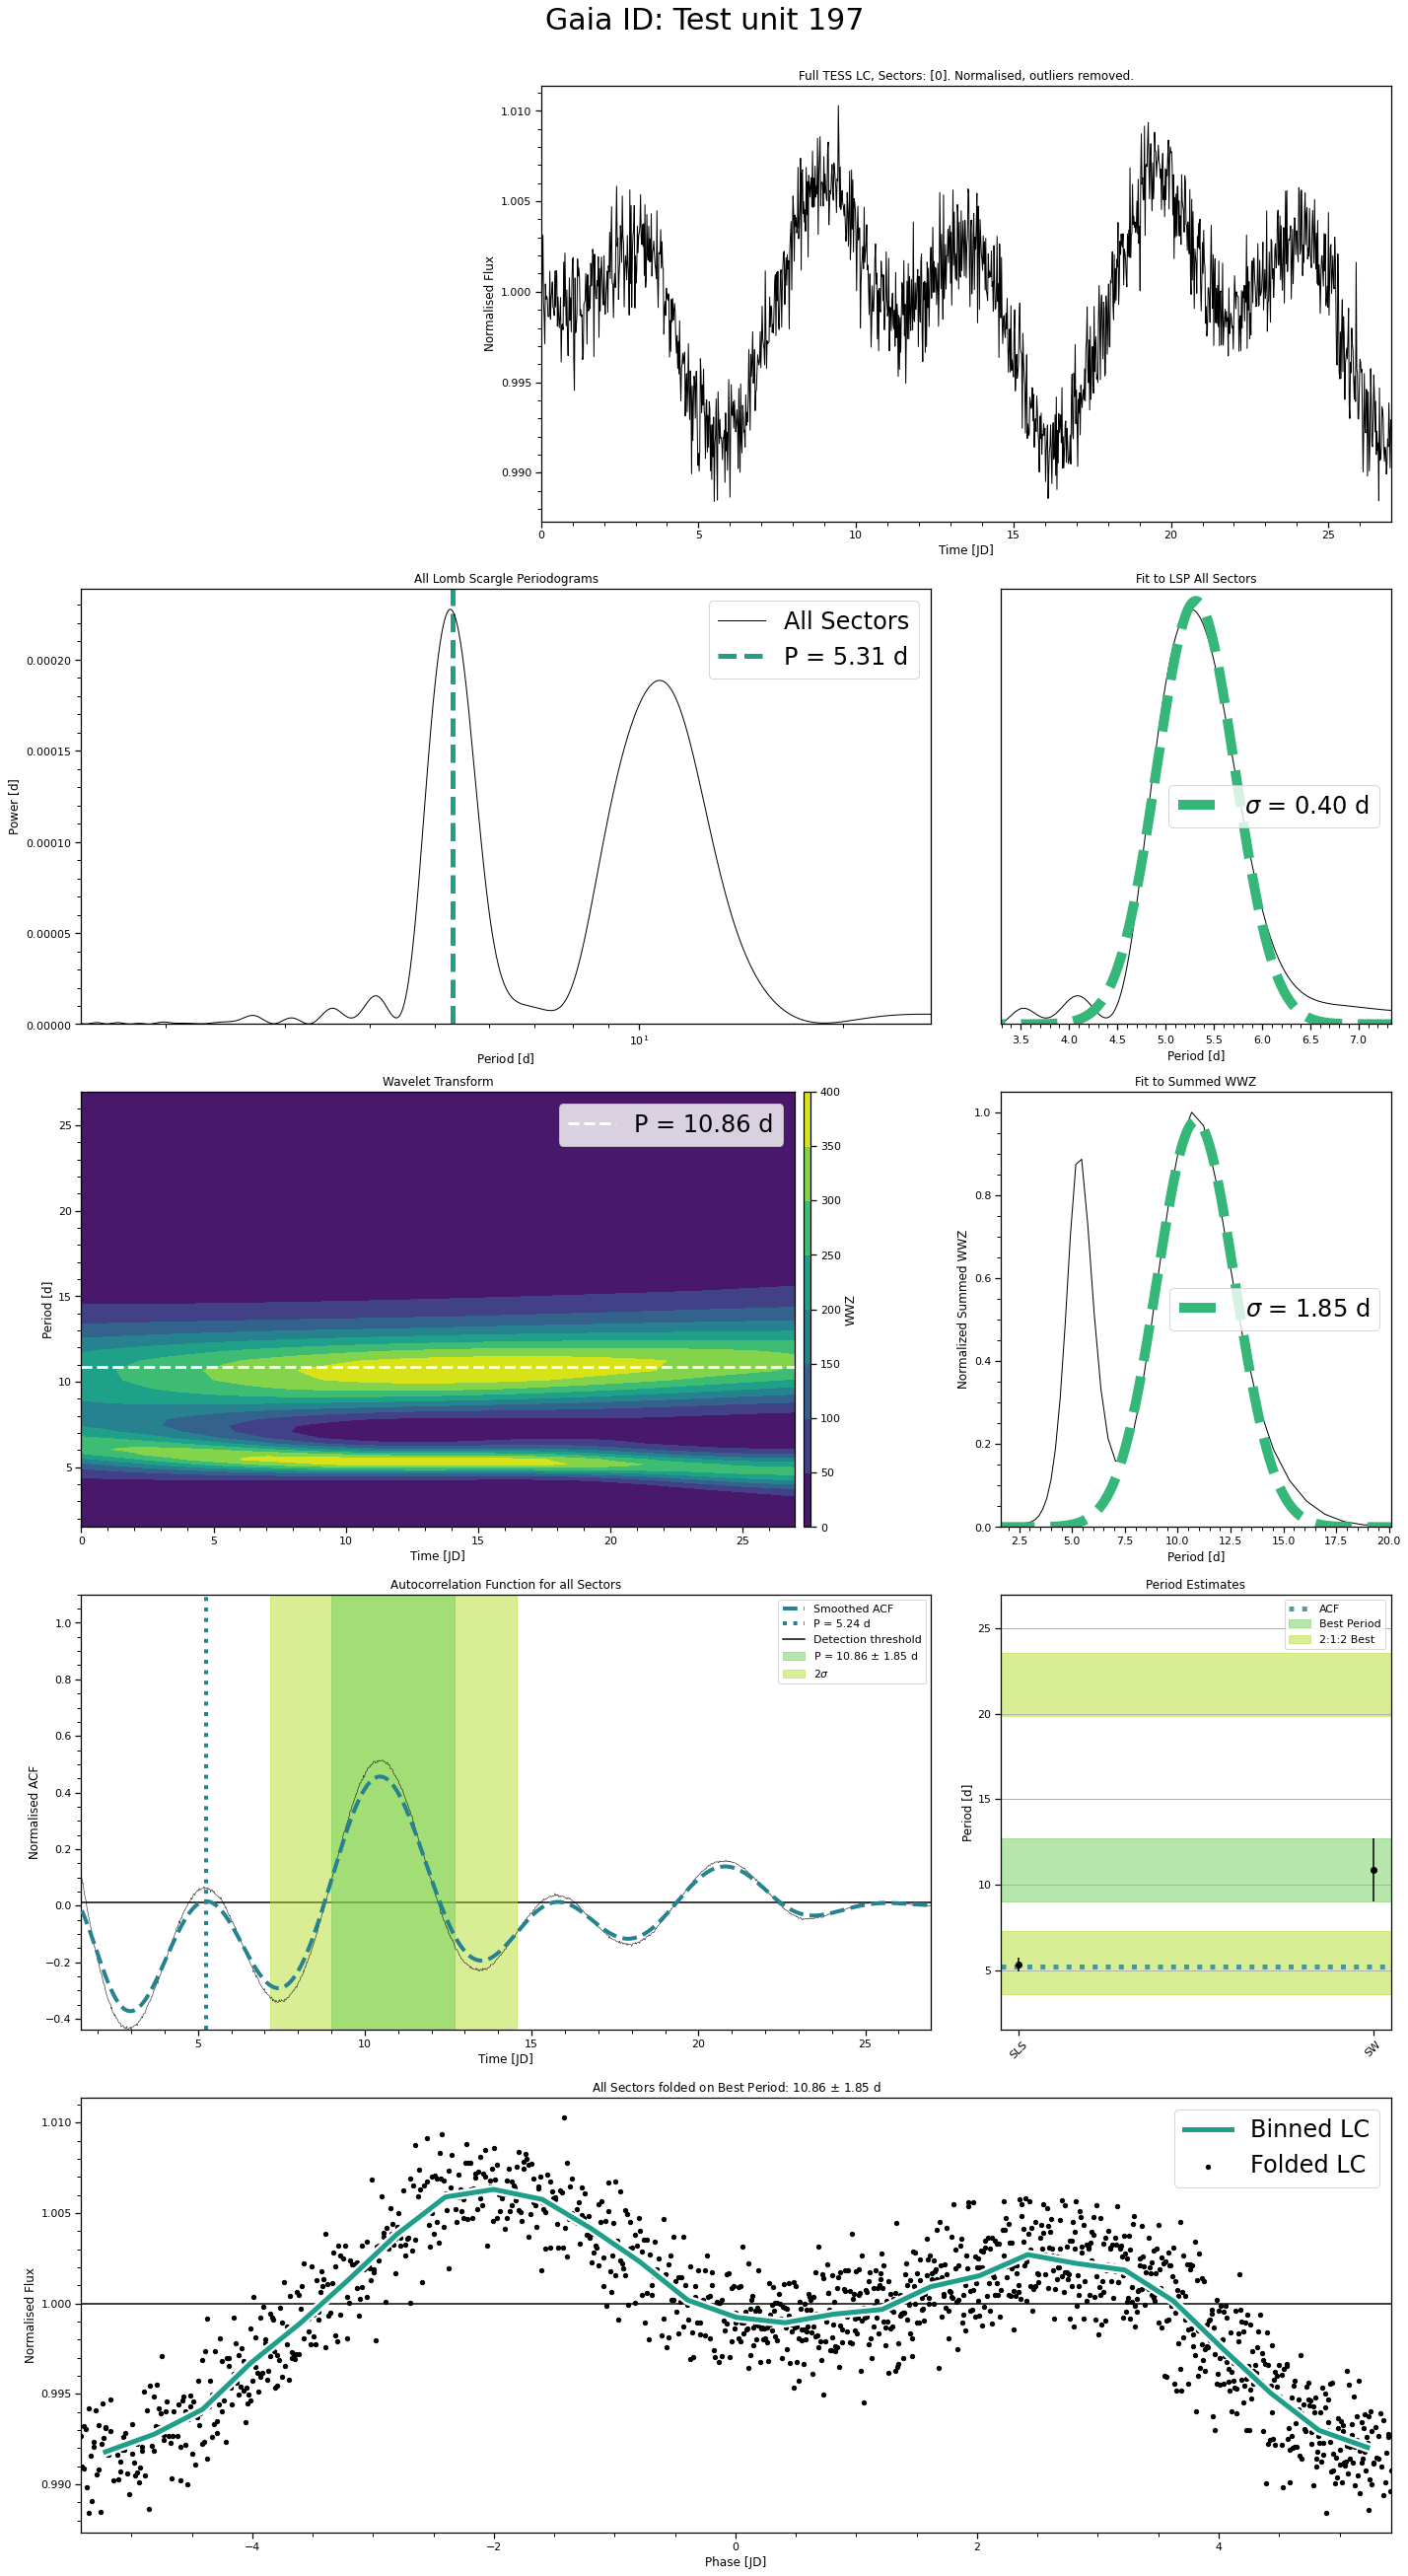

In [106]:
j.view();